In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
sys.path.append('../scripts')
from scripts.data_handler import DataOrganize, DataModes

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data_organize = DataOrganize()
data_organize.create_clean_data(mode=DataModes.RANDOM_1000)
print(len(data_organize.data))

100%|██████████| 1000/1000 [00:37<00:00, 26.65it/s]


<class 'str'>


100%|██████████| 726/726 [00:00<00:00, 19087.25it/s]

726


In [3]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix
from scripts.sentiment_analysis_evaluator import Evaluator

filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_vader = Evaluator(model = None,tokenizer = None,data=filtered_data)
accuracy = evaluator_vader.evaluate_vader()
print(f"Accuracy of Vader sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

Vader Sentiment Analysis: 100%|██████████| 378/378 [00:13<00:00, 27.37it/s]

Accuracy of Vader sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.71


In [ ]:
evaluator_vader.show_confusion_matrix()

In [ ]:
evaluator_vader.show_bad_samples(num = 10)


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scripts.sentiment_analysis_evaluator import Evaluator

from tqdm import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix

model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_finbert = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_finbert.evaluate_model_fin_bert()
print(f"Accuracy of finbert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

In [ ]:
evaluator_finbert.show_confusion_matrix()

In [ ]:
evaluator_finbert.show_bad_samples(num=10)

In [4]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
import importlib
class_name = importlib.import_module("sentiment_analysis_evaluator")
importlib.reload(class_name)
from scripts.sentiment_analysis_evaluator import Evaluator
model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_cryptobert = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_cryptobert.evaluate_model_crypto_bert()
print(f"Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

CryptoBERT Sentiment Analysis: 100%|██████████| 378/378 [00:50<00:00,  7.53it/s]

Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.85


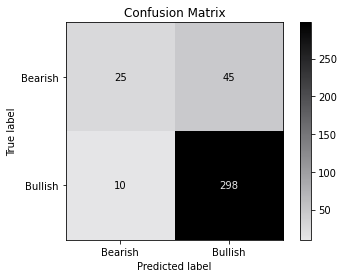

In [5]:
evaluator_cryptobert.show_confusion_matrix()

In [7]:
evaluator_cryptobert.show_bad_samples(num=20)

Actual Label: Bearish
Predicted Label: Bullish
Text: $AVAX.X $VRA.X $XRP.X Covered Long- now Shorting $ETH.X HARD
Prediction Confidency 
tensor([[1.2126e-04, 7.7245e-01, 2.2743e-01]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $XRP.X Reasons why we see 0.50s EOW:\nBTC rejected AGAIN at 36k. \nRipple Swell UNEVENTFUL\nSettlement chances &lt;1% (window closes tomorrow)
Prediction Confidency 
tensor([[0.0556, 0.7488, 0.1957]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $BNB.X Binance will soon death spiral after SBF spills his guts on all the illegal shit CZ is up to. The Biden regime will take CZ down. 🤗🚀🚀🚀🚀
Prediction Confidency 
tensor([[1.1144e-04, 6.1214e-01, 3.8775e-01]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $MATIC.X send it to 0.69 already so we can all ape in
Prediction Confidency 
tensor([[0

In [4]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline



from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
import importlib
class_name = importlib.import_module("sentiment_analysis_evaluator")
importlib.reload(class_name)
from scripts.sentiment_analysis_evaluator import Evaluator
model_name = "kk08/CryptoBERT"
tokenizer = BertTokenizer.from_pretrained(model_name, use_fast=True)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels = 2)
filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_cryptobert2 = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_cryptobert2.evaluate_model_crypto_bert2()


CryptoBERT 2 Sentiment Analysis: 100%|██████████| 382/382 [00:32<00:00, 11.80it/s]


Accuracy of cryptobert version 2 sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.75


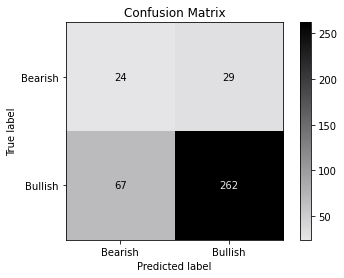

In [5]:
print(f"Accuracy of cryptobert version 2 sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")
evaluator_cryptobert2.show_confusion_matrix()

In [6]:
evaluator_cryptobert2.show_bad_samples(10)

Actual Label: Bearish
Predicted Label: Bullish
Text: $AVAX.X the dilution is real here
Prediction Confidency 
tensor([[0.0444, 0.9556]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $DOGE.X dreaming of a life where I bought Solana instead of Doge
Prediction Confidency 
tensor([[0.0907, 0.9093]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X  at the neckline. Target is 30 cents... I doubt that, but anything possible. Head and shoulders pattern?  My opinion.
Prediction Confidency 
tensor([[0.0989, 0.9011]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $MATIC.X lol told you retards only the beginning
Prediction Confidency 
tensor([[0.1693, 0.8307]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $DOGE.X This is probably gonna sell off after Elons la